# Stock data basic analytics

## A) Retrieve stock data from web

Go through your Lecture 3 to digest the stock retrieve, volatility calculation details via using Pandas and related materials. Then ﬁnish the following assignments.

1. Retrieve stock data for the following types of companies from Sept 01, 2006 to Sept 01, 2019 in Excel ﬁles1

  (a) IT: GOOGLE (GOOG), APPLE (AAPL), Microsoft (MSFT), Amazon (AMZN), “INTC’
  
  (b) Bank: ’JPM’, ’BAC’, ’HSBC’, ’C’ , ’GS’
  
  (c) Retail: WMT, TGT, JCP, KSS, HD
  
  (d) Pharmaceutical: PFE, MRK,JNJ, ABBV, BMY
  
  (e) Fashion: TPR, HM-B, GES,MC, TIF
  
  
2. Compare the stock price patterns of these companies during the years (need plots)

3. Calculate the days of up and down for each stock in each year.

4. Calculate the stock log returns for each stock and plot it

5. Compute the max, min, mean, median, standard deviation, skewness, kurtosis for close price and volume for each data set (need plots).

6. Output all stock prices (close price) which are >= 95% percentile and their corresponding volumes and dates for each data set.

7. Give your analysis about volatility performance of the stocks (need plots).

8. Calculate and visualize the recent ﬁve years S-ratios for the stocks.



In [1]:
import numpy as np
import pandas as pd
import openpyxl
import pandas_datareader.data as web
import pylab as plt
from pylab import plot, show
from math import log

#### 1. Retrieve stock data for the following types of companies from Sept 01, 2006 to Sept 01, 2019 in Excel ﬁles1

In [3]:

s_date = '9/1/2006'
e_date = '9/1/2019'

# IT

goog = web.DataReader('GOOG', data_source='yahoo', start = s_date, end = e_date)
aapl = web.DataReader('AAPL', data_source='yahoo', start = s_date, end = e_date)
msft = web.DataReader('MSFT', data_source='yahoo', start = s_date, end = e_date)
amzn = web.DataReader('AMZN', data_source='yahoo', start = s_date, end = e_date)
intc = web.DataReader('INTC',data_source = 'yahoo',start = s_date, end = e_date)

# BANK

jpm = web.DataReader('JPM', data_source='yahoo', start = s_date, end = e_date)
bac = web.DataReader('BAC', data_source='yahoo', start = s_date, end = e_date)
hsbc = web.DataReader('HSBC', data_source='yahoo', start = s_date, end = e_date)
c = web.DataReader('CIT', data_source='yahoo', start = s_date, end = e_date)
gs = web.DataReader('GS', data_source='yahoo', start = s_date, end = e_date)

# RETAIL

wmt = web.DataReader('WMT',data_source = 'yahoo',start= s_date, end = e_date)
tgt = web.DataReader('TGT',data_source = 'yahoo',start = s_date, end = e_date)
jcp = web.DataReader('JCP',data_source = 'yahoo',start = s_date, end = e_date)
kss = web.DataReader('KSS',data_source = 'yahoo',start = s_date, end = e_date)
hd = web.DataReader('HD',data_source = 'yahoo',start = s_date, end = e_date)

# PharmaceuticaL

pfe = web.DataReader('PFE',data_source = 'yahoo',start= s_date, end = e_date)
mrk = web.DataReader('MRK',data_source = 'yahoo',start = s_date, end = e_date)
jnj = web.DataReader('JNJ',data_source = 'yahoo',start = s_date, end = e_date)
abbv = web.DataReader('ABBV',data_source = 'yahoo',start = s_date, end = e_date)
bmy = web.DataReader('BMY',data_source = 'yahoo',start = s_date, end = e_date)


# FASHION

tpr = web.DataReader('TPR',data_source = 'yahoo',start= s_date, end = e_date)
hm_b = web.DataReader('HM-B.ST',data_source = 'yahoo',start = s_date, end = e_date)
ges = web.DataReader('GES',data_source = 'yahoo',start = s_date, end = e_date)
mc = web.DataReader('MC',data_source = 'yahoo',start = s_date, end = e_date)
tif = web.DataReader('TIF',data_source = 'yahoo',start = s_date, end = e_date)


filename = 'stock_data.xlsx'

# IT
writer = pd.ExcelWriter('stock_data.xlsx')
goog.to_excel(writer, 'google')
aapl.to_excel(writer, 'apple')
msft.to_excel(writer, 'microsoft')
amzn.to_excel(writer, 'amazon')
intc.to_excel(writer, 'intc')

# BANK
jpm.to_excel(writer, 'jpm')
bac.to_excel(writer, 'boa')
hsbc.to_excel(writer, 'hsbc')
c.to_excel(writer, 'citi')
gs.to_excel(writer, 'goldman')

# RETAIL

wmt.to_excel(writer, 'wmt')
tgt.to_excel(writer, 'tgt')
jcp.to_excel(writer, 'jcp')
kss.to_excel(writer, 'kss')
hd.to_excel(writer, 'hd')


# PharmaceuticaL

pfe.to_excel(writer, 'pfe')
mrk.to_excel(writer, 'mrk')
jnj.to_excel(writer, 'jnj')
abbv.to_excel(writer, 'abbv')
bmy.to_excel(writer, 'bmy')

# FASHION

tpr.to_excel(writer, 'tpr')
hm_b.to_excel(writer, 'hm')
ges.to_excel(writer, 'ges')
mc.to_excel(writer, 'mc')
tif.to_excel(writer, 'tif')

writer.save()

#### 2. Compare the stock price patterns of these companies during the years (need plots)

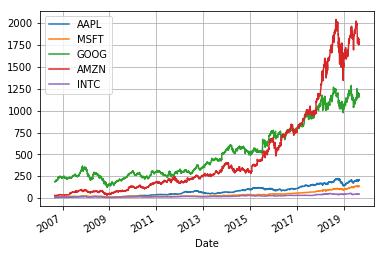

In [4]:
# Group A IT
stocks_a = pd.DataFrame({"AAPL": aapl["Adj Close"],"MSFT": msft["Adj Close"],"GOOG":goog["Adj Close"],"AMZN":amzn["Adj Close"],"INTC" : intc["Adj Close"]})
stocks_a.plot(grid = True)
plt.show()

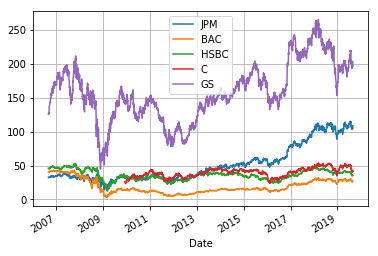

In [5]:
# Group B IT

stocks_b = pd.DataFrame({"JPM": jpm["Adj Close"],"BAC": bac["Adj Close"],"HSBC": hsbc["Adj Close"],"C":c["Adj Close"],"GS" : gs["Adj Close"]})
stocks_b.plot(grid = True)
plt.show()

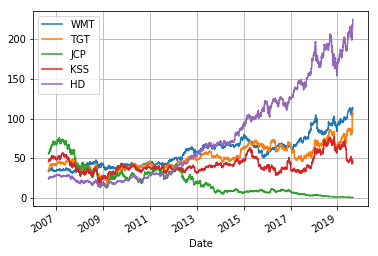

In [6]:
# Group C RETAIL
stocks_c = pd.DataFrame({"WMT": wmt["Adj Close"],"TGT": tgt["Adj Close"],"JCP": jcp["Adj Close"],"KSS":kss["Adj Close"],"HD" : hd["Adj Close"]})
stocks_c.plot(grid = True)
plt.show()

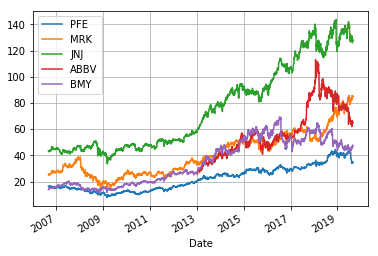

In [7]:
# Group D PharmaceuticaL
stocks_d = pd.DataFrame({"PFE": pfe["Adj Close"],"MRK": mrk["Adj Close"],"JNJ": jnj["Adj Close"],"ABBV":abbv["Adj Close"],"BMY" : bmy["Adj Close"]})

stocks_d.plot(grid = True)

plt.show()

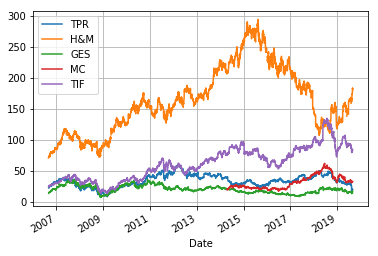

In [8]:
# Group E Fashion
stocks_e = pd.DataFrame({"TPR": tpr["Adj Close"],"H&M": hm_b["Adj Close"],"GES": ges["Adj Close"],"MC":mc["Adj Close"],"TIF" : tif["Adj Close"]})

stocks_e.plot(grid = True)

plt.show()

#### 3. Calculate the days of up and down for each stock in each year.

In [85]:
def Cal_Day_up_down(stockname):
    
    # define start year and end year
    start_year = str(stockname.head(1).index.tolist()[0])[0:4]
    end_year = str(stockname.tail(1).index.tolist()[0])[0:4]
    start_year_int = int(start_year)
    end_year_int = int(end_year)
    
    # calculate 
    for i in range(start_year_int,end_year_int):
        count_day_up = 0
        count_day_down = 0
        df_years = stockname[start_year]
        df_open=df_years['Open']
        df_down=df_years['Close']
        length=df_open.shape[0]

        for n in range(0, length):
         ## count day-up：
            if (df_open[n]<df_down[n]):
                count_day_up += 1
         ##count day_down:
            if (df_open[n]>df_down[n]):
                count_day_down += 1
            
        print("Stock has", count_day_up, "days up and", count_day_down, "days down in year ",i, "\n")
        i=i+1

stockList=[goog,aapl,msft,amzn,intc,jpm,bac,hsbc,c,gs,wmt,tgt,jcp,kss,hd,pfe,mrk,jnj,abbv,bmy,tpr,hm_b,ges,mc,tif]
stockList_str=["Google","Apple","Microsoft","Amazon", "INTC", "J.P MORGAN","BANK OF AMERICA","HSBC","CITI BANK","GOLDMAN","wmt","tgt","jcp","kss","hd","pfe","mrk","jnj","abbv","bmy","tpr","hm_b","ges","mc","tif"]

i = 0
for name in stockList :
    print(stockList_str[i],"\n")
    Cal_Day_up_down(name)
    print("\n")
    i = i+1








Google 

Stock has 38 days up and 45 days down in year  2006 

Stock has 38 days up and 45 days down in year  2007 

Stock has 38 days up and 45 days down in year  2008 

Stock has 38 days up and 45 days down in year  2009 

Stock has 38 days up and 45 days down in year  2010 

Stock has 38 days up and 45 days down in year  2011 

Stock has 38 days up and 45 days down in year  2012 

Stock has 38 days up and 45 days down in year  2013 

Stock has 38 days up and 45 days down in year  2014 

Stock has 38 days up and 45 days down in year  2015 

Stock has 38 days up and 45 days down in year  2016 

Stock has 38 days up and 45 days down in year  2017 

Stock has 38 days up and 45 days down in year  2018 

Apple 

Stock has 39 days up and 44 days down in year  2006 

Stock has 39 days up and 44 days down in year  2007 

Stock has 39 days up and 44 days down in year  2008 

Stock has 39 days up and 44 days down in year  2009 

Stock has 39 days up and 44 days down in year  2010 

Stock has 3

Stock has 47 days up and 36 days down in year  2013 

Stock has 47 days up and 36 days down in year  2014 

Stock has 47 days up and 36 days down in year  2015 

Stock has 47 days up and 36 days down in year  2016 

Stock has 47 days up and 36 days down in year  2017 

Stock has 47 days up and 36 days down in year  2018 

kss 

Stock has 43 days up and 39 days down in year  2006 

Stock has 43 days up and 39 days down in year  2007 

Stock has 43 days up and 39 days down in year  2008 

Stock has 43 days up and 39 days down in year  2009 

Stock has 43 days up and 39 days down in year  2010 

Stock has 43 days up and 39 days down in year  2011 

Stock has 43 days up and 39 days down in year  2012 

Stock has 43 days up and 39 days down in year  2013 

Stock has 43 days up and 39 days down in year  2014 

Stock has 43 days up and 39 days down in year  2015 

Stock has 43 days up and 39 days down in year  2016 

Stock has 43 days up and 39 days down in year  2017 

Stock has 43 days up a

B) Polish your software so that (20 points)

#### 4. Calculate the stock log returns for each stock and plot it

Google 



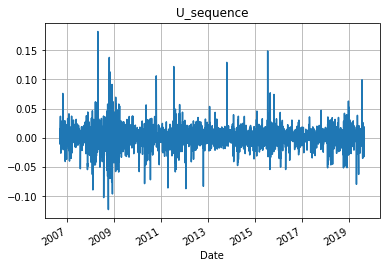

Apple 



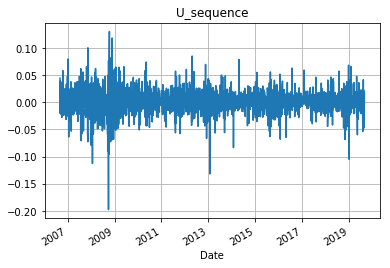

Microsoft 



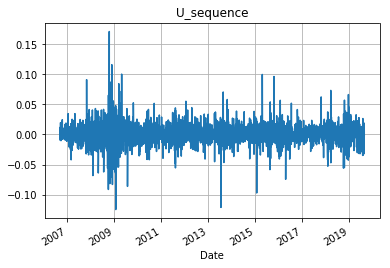

Amazon 



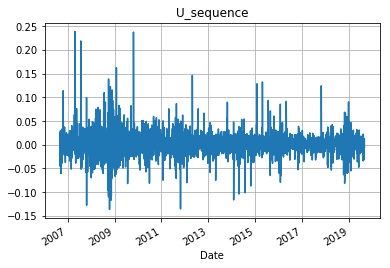

INTC 



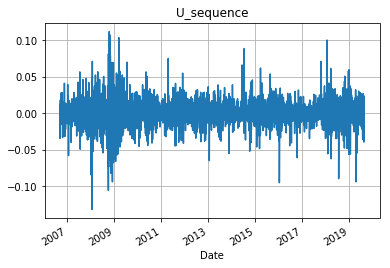

J.P MORGAN 



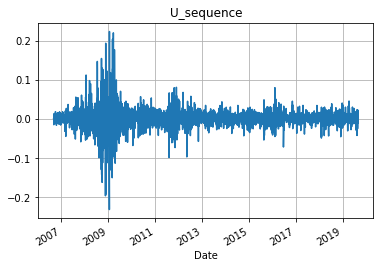

BANK OF AMERICA 



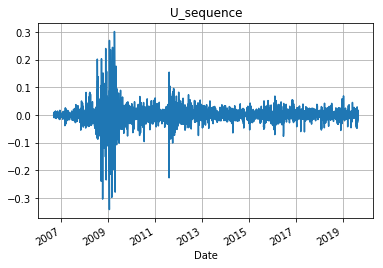

HSBC 



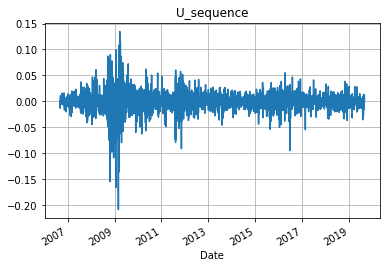

CITI BANK 



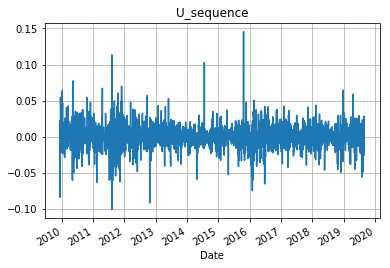

GOLDMAN 



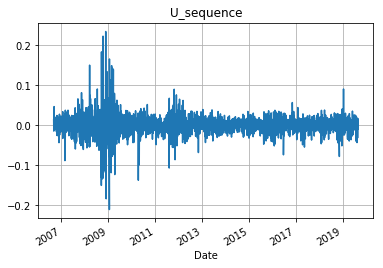

wmt 



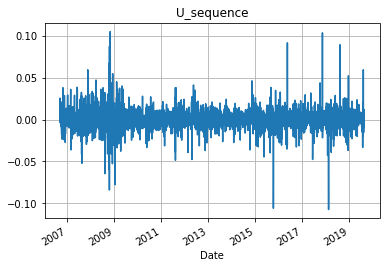

tgt 



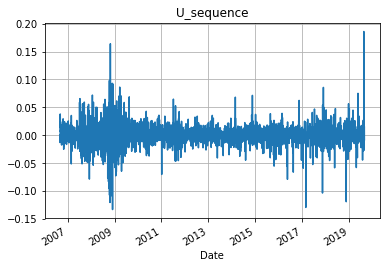

jcp 



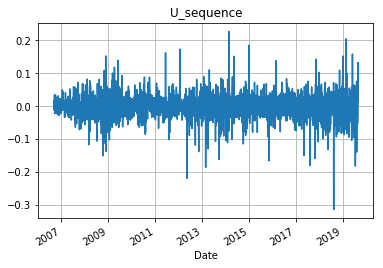

kss 



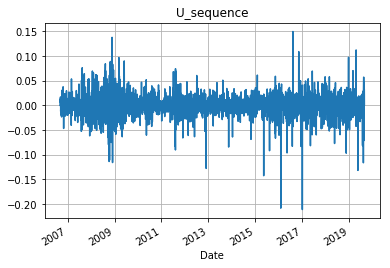

hd 



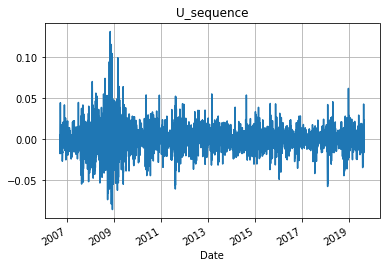

pfe 



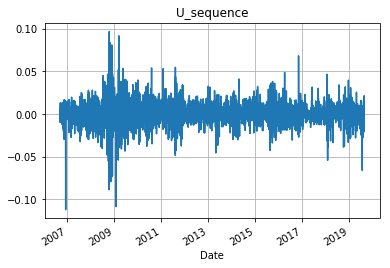

mrk 



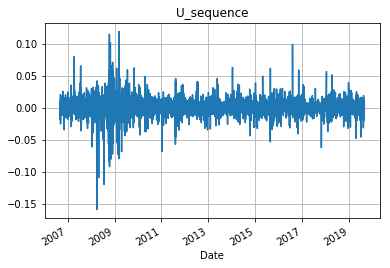

jnj 



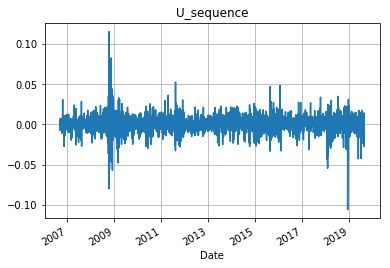

abbv 



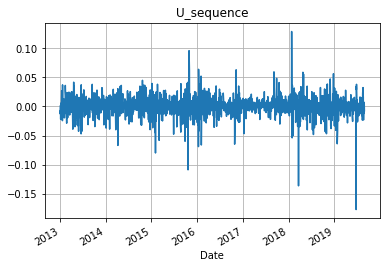

bmy 



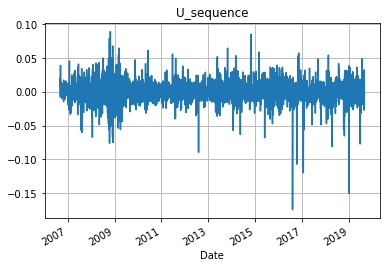

tpr 



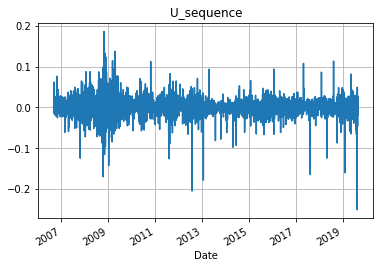

hm_b 



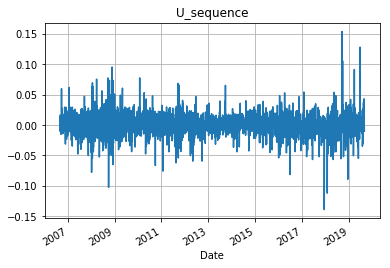

ges 



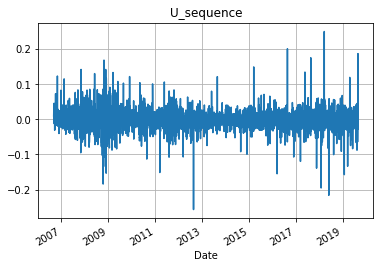

mc 



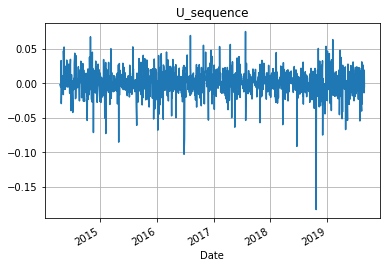

tif 



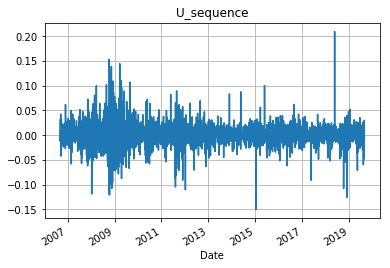

In [87]:
i = 0

def logReturn(name):
    S_i = name['Close']
    S_i_minus_1 = name['Close'].shift(1)
    name['U_sequence'] = np.log(S_i/S_i_minus_1)
    name['U_sequence'].plot(title = "U_sequence",grid = True)
    plt.show()

for name in stockList :
    print(stockList_str[i],"\n")
    logReturn(name)
    print("\n")
    i = i+1
    
    

#### 5. Compute the max, min, mean, median, standard deviation, skewness, kurtosis for close price and volume for each data set (need plots).

Google 



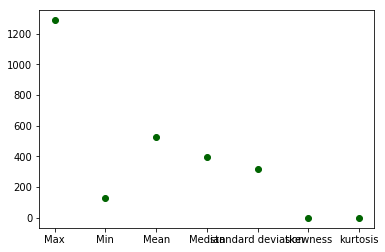

<Figure size 1296x1080 with 0 Axes>

Apple 



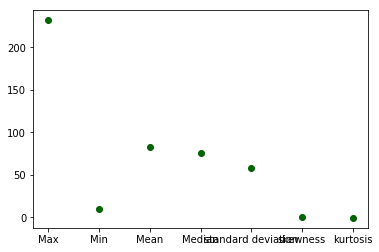

<Figure size 1296x1080 with 0 Axes>

Microsoft 



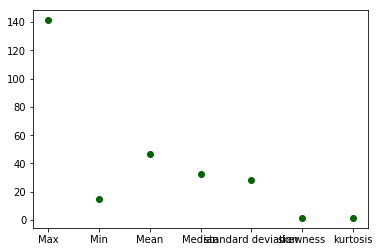

<Figure size 1296x1080 with 0 Axes>

Amazon 



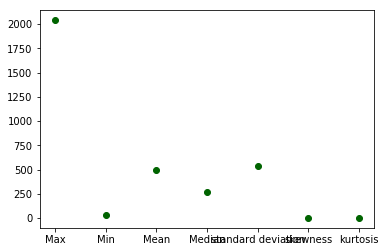

<Figure size 1296x1080 with 0 Axes>

INTC 



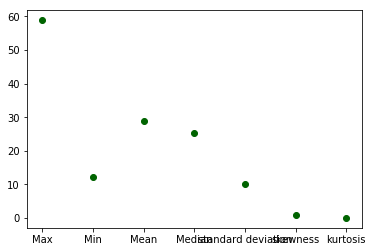

<Figure size 1296x1080 with 0 Axes>

J.P MORGAN 



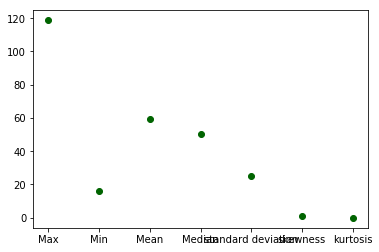

<Figure size 1296x1080 with 0 Axes>

BANK OF AMERICA 



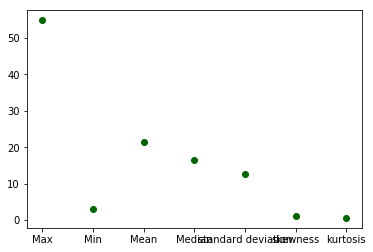

<Figure size 1296x1080 with 0 Axes>

HSBC 



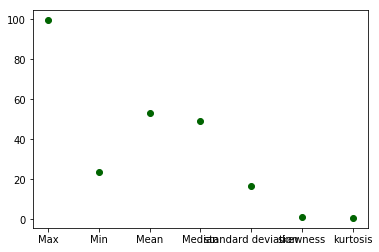

<Figure size 1296x1080 with 0 Axes>

CITI BANK 



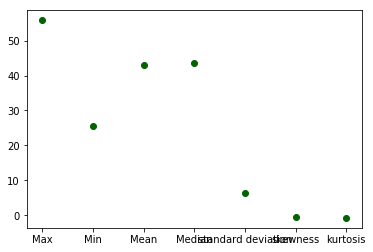

<Figure size 1296x1080 with 0 Axes>

GOLDMAN 



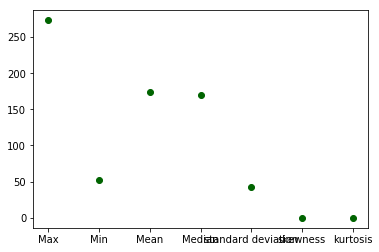

<Figure size 1296x1080 with 0 Axes>

wmt 



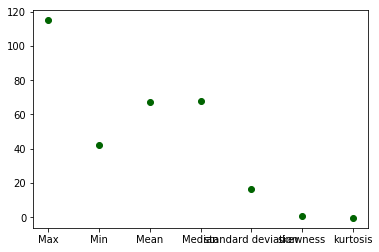

<Figure size 1296x1080 with 0 Axes>

tgt 



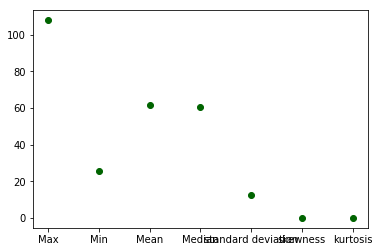

<Figure size 1296x1080 with 0 Axes>

jcp 



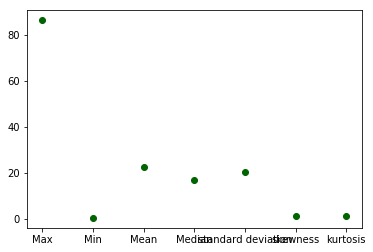

<Figure size 1296x1080 with 0 Axes>

kss 



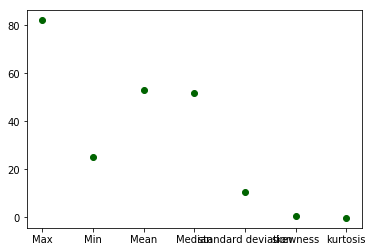

<Figure size 1296x1080 with 0 Axes>

hd 



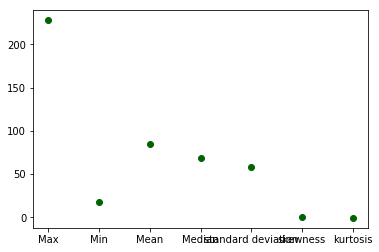

<Figure size 1296x1080 with 0 Axes>

pfe 



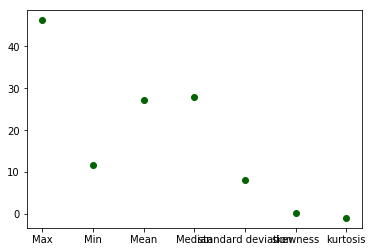

<Figure size 1296x1080 with 0 Axes>

mrk 



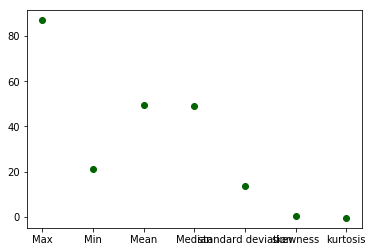

<Figure size 1296x1080 with 0 Axes>

jnj 



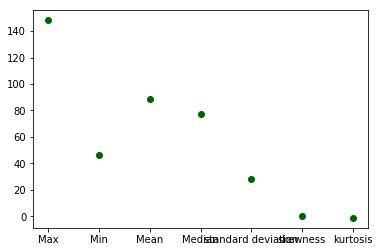

<Figure size 1296x1080 with 0 Axes>

abbv 



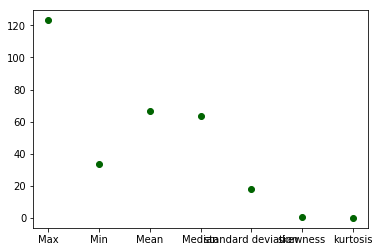

<Figure size 1296x1080 with 0 Axes>

bmy 



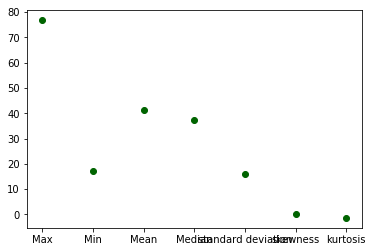

<Figure size 1296x1080 with 0 Axes>

tpr 



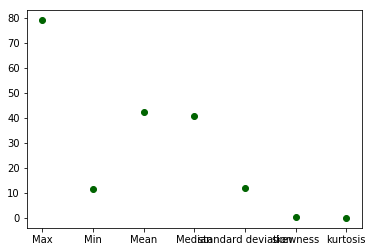

<Figure size 1296x1080 with 0 Axes>

hm_b 



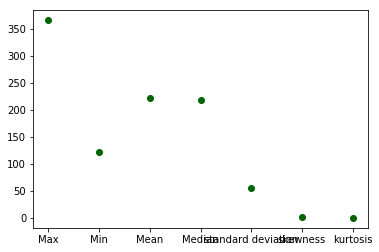

<Figure size 1296x1080 with 0 Axes>

ges 



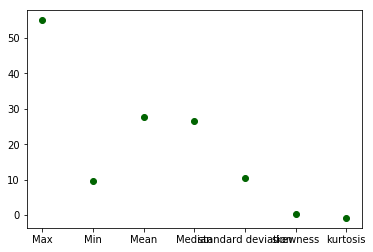

<Figure size 1296x1080 with 0 Axes>

mc 



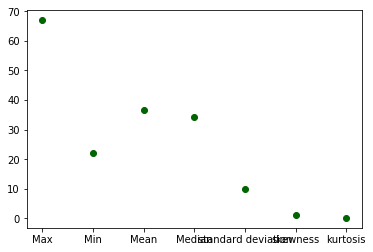

<Figure size 1296x1080 with 0 Axes>

tif 



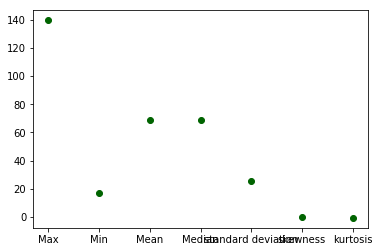

<Figure size 1296x1080 with 0 Axes>

In [147]:


##(5).................
def Summary(stockname):
    # compute the max, min, mean, median, standard deviation, skewness, kurtosis for close price
    df1=stockname['Close']
    max_close_price=df1.max()
    min_close_price=df1.min()
    mean_close_price=df1.mean()
    median_close_price=df1.median()
    sd_close_price=df1.std()
    skew_close_price=df1.skew()
    kur_close_price=df1.kurtosis()
    y=[max_close_price,min_close_price,mean_close_price,median_close_price,sd_close_price,skew_close_price,kur_close_price]
    
    # compute the max, min, mean, median, standard deviation, skewness, kurtosis for volume
    
    df2=stockname['Volume']
    max_volume = df2.max()
    min_volume= df2.min()
    mean_volume = df2.mean()
    median_volume = df2.median()
    sd_volume = df2.std()
    skew_volume = df2.skew()
    kur_volume = df2.kurtosis()
    z= [max_volume,min_volume,mean_volume,median_volume,sd_volume,skew_volume,kur_volume]
    
    ## Plot the data
    
    cal_dataframe  = [y,z]
    data=pd.DataFrame(cal_dataframe,index=['Close Price','Volume'],columns=['Max','Min','Mean','Median','standard deviation','skewness','kurtosis'])
    plt.scatter(x = ['Max','Min','Mean','Median','standard deviation','skewness','kurtosis'],y = data[:'Close Price'],color='DarkGreen')
    plt.figure(figsize=(18, 15))
    plt.show()

i = 0

for name in stockList :
    print(stockList_str[i],"\n")
    Summary(name)
    print("\n")
    i = i+1
    
                       

#### 6. Output all stock prices (close price) which are >= 95% percentile and their corresponding volumes and dates for each data set.

In [150]:

def Output_95percentile_price(name):
    num = np.percentile(name['Close'],95)
    print(name[name['Close']>num])




i = 0

for name in stockList :
    print(stockList_str[i],"\n")
    Output_95percentile_price(name)
    print("\n")
    i = i+1


Google 

                   High          Low         Open        Close     Volume  \
Date                                                                        
2018-01-22  1159.880005  1135.109985  1137.489990  1155.810059  1618000.0   
2018-01-23  1171.626953  1158.750000  1159.849976  1169.969971  1333100.0   
2018-01-24  1179.859985  1161.050049  1177.329956  1164.239990  1416600.0   
2018-01-25  1175.939941  1162.760010  1172.530029  1170.369995  1480500.0   
2018-01-26  1175.839966  1158.109985  1175.079956  1175.839966  2018800.0   
2018-01-29  1186.890015  1171.979980  1176.479980  1175.579956  1378900.0   
2018-01-30  1176.520020  1163.520020  1167.829956  1163.689941  1556300.0   
2018-01-31  1173.000000  1159.130005  1170.569946  1169.939941  1538700.0   
2018-02-01  1174.000000  1157.520020  1162.609985  1167.699951  2412100.0   
2018-03-09  1160.800049  1132.461060  1136.000000  1160.040039  2128000.0   
2018-03-12  1177.050049  1157.420044  1163.849976  1164.500000  217

                  High         Low        Open       Close     Volume  \
Date                                                                    
2014-12-23  327.899994  324.799988  326.200012  327.899994  1956099.0   
2014-12-29  329.500000  326.100006  327.899994  327.100006  1597591.0   
2015-01-02  328.600006  325.899994  327.000000  327.000000  1327931.0   
2015-01-13  332.799988  324.299988  324.799988  331.500000  3254651.0   
2015-01-15  332.000000  320.100006  330.000000  330.299988  4320053.0   
2015-01-16  335.399994  328.500000  329.200012  334.600006  2685828.0   
2015-01-19  335.500000  332.500000  335.299988  333.100006  2166985.0   
2015-01-20  337.399994  333.799988  334.899994  335.100006  9251619.0   
2015-01-21  338.399994  334.899994  336.799988  338.399994  2399808.0   
2015-01-22  339.100006  335.000000  338.000000  338.000000  2471853.0   
2015-01-23  342.200012  338.200012  338.899994  339.799988  3479059.0   
2015-01-26  343.200012  338.500000  339.500000  343

#### 7. Give your analysis about volatility performance of the stocks (need plots).

Google 



/Users/wusuyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


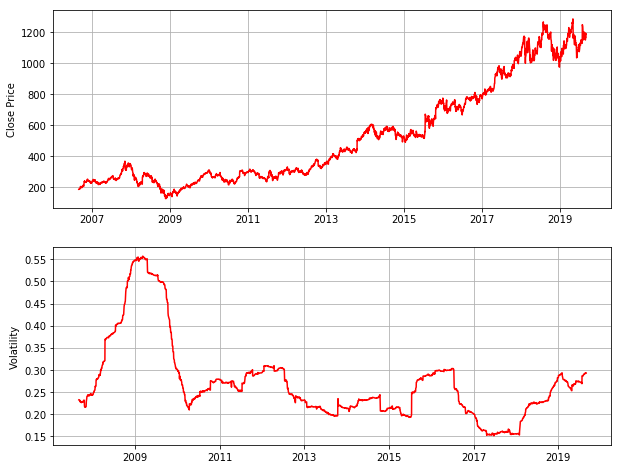

Apple 



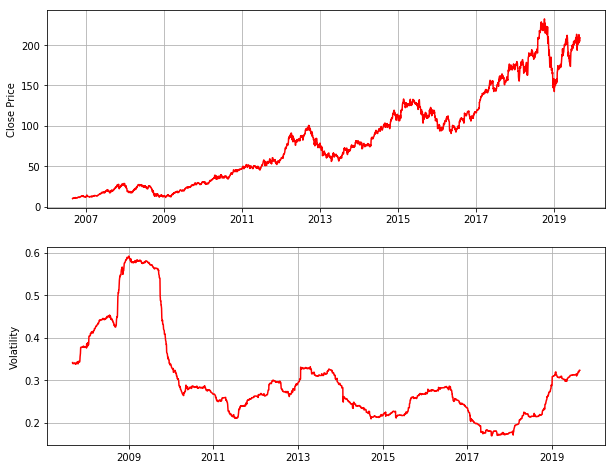

Microsoft 



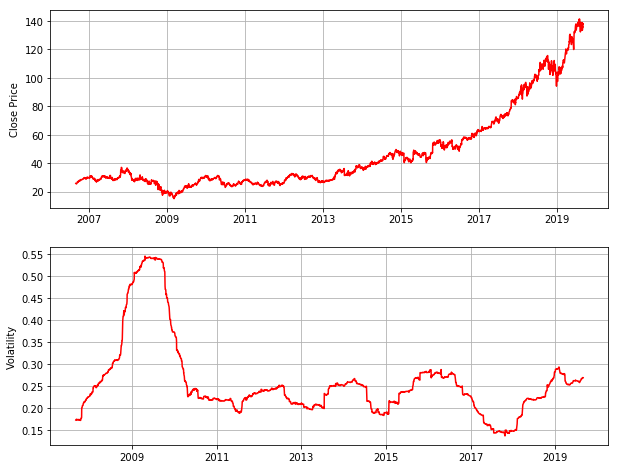

Amazon 



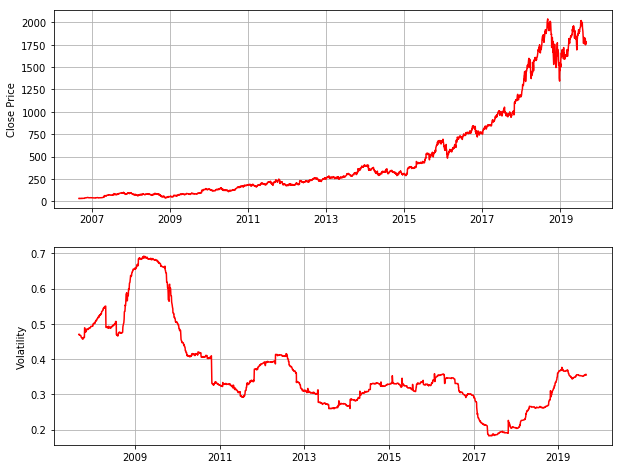

INTC 



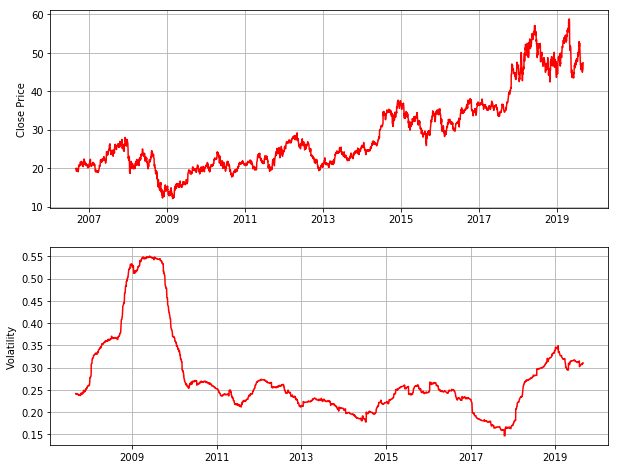

J.P MORGAN 



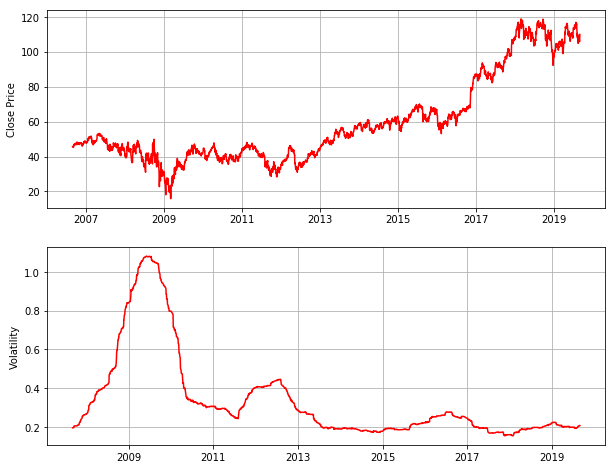

BANK OF AMERICA 



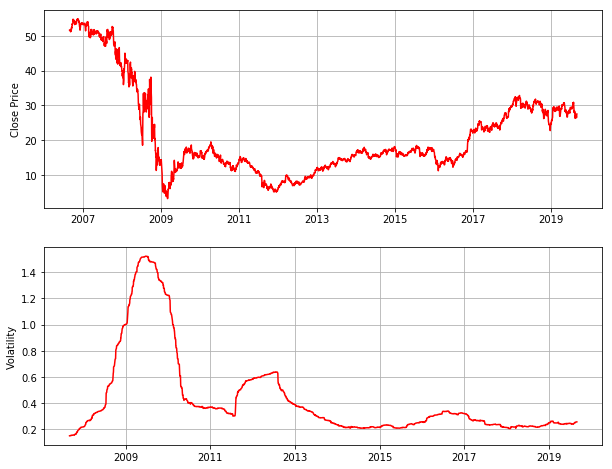

HSBC 



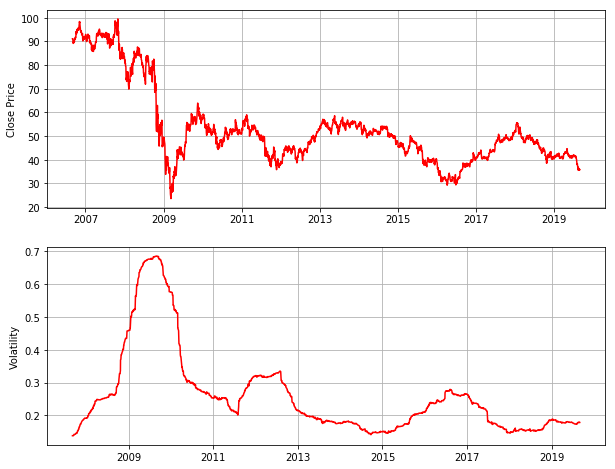

CITI BANK 



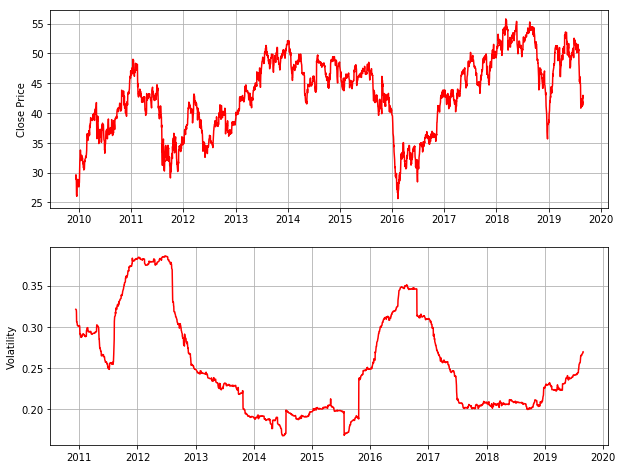

GOLDMAN 



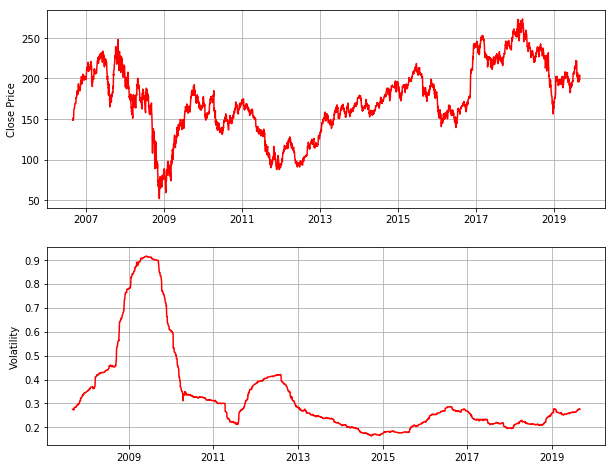

wmt 



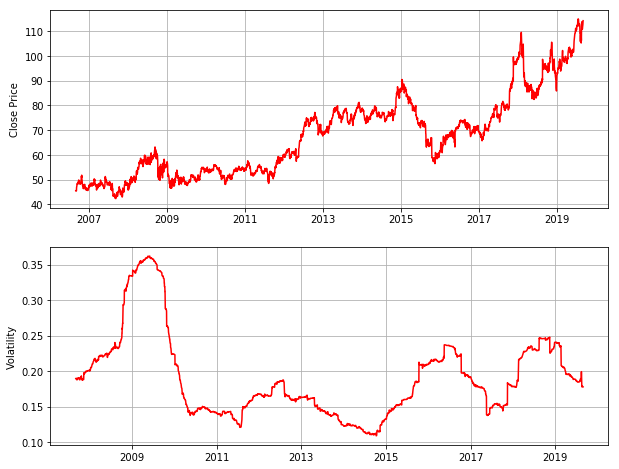

tgt 



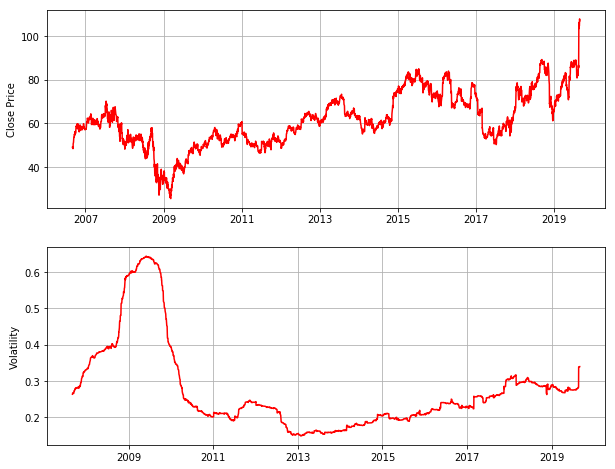

jcp 



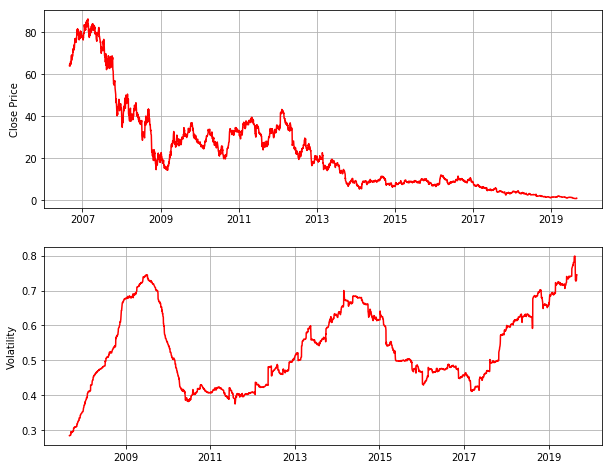

kss 



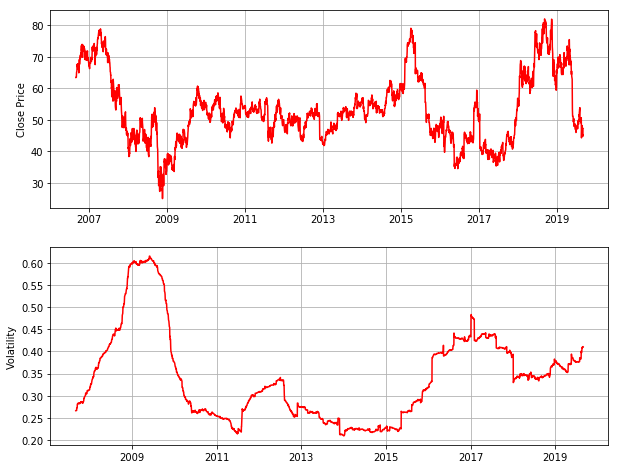

hd 



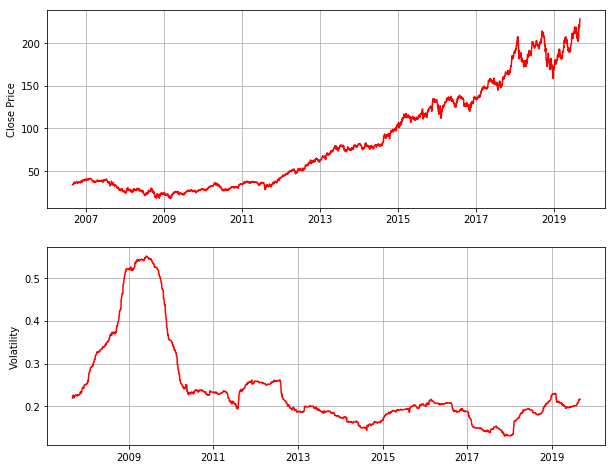

pfe 



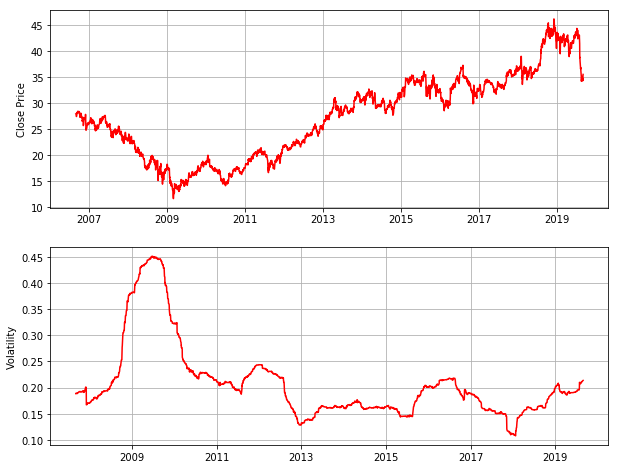

mrk 



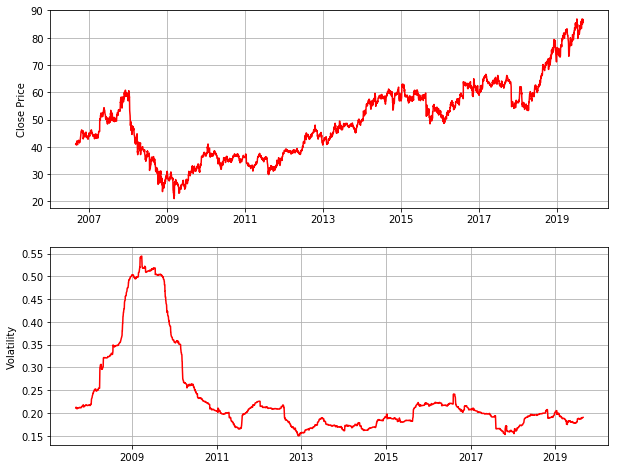

jnj 



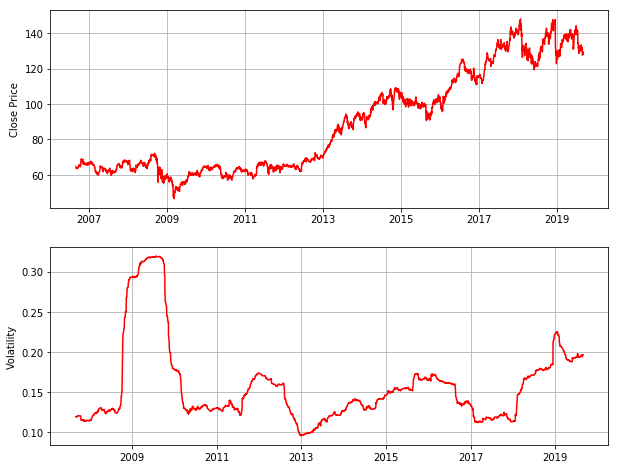

abbv 



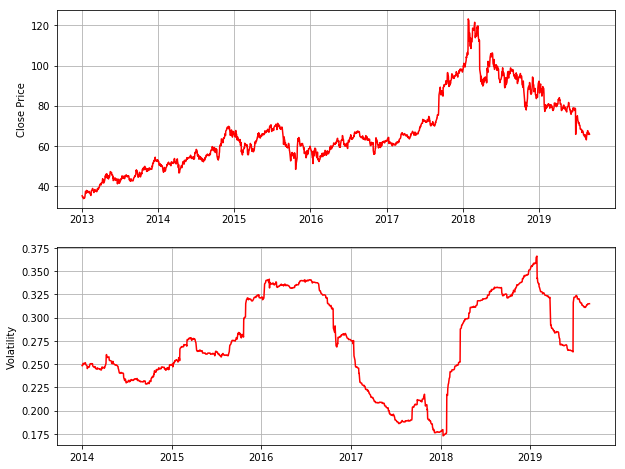

bmy 



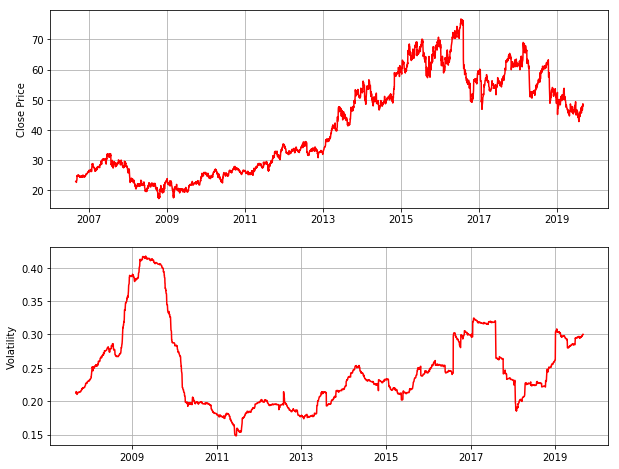

tpr 



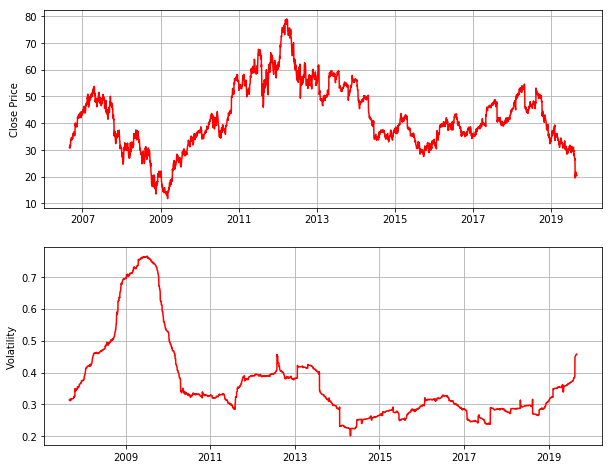

hm_b 



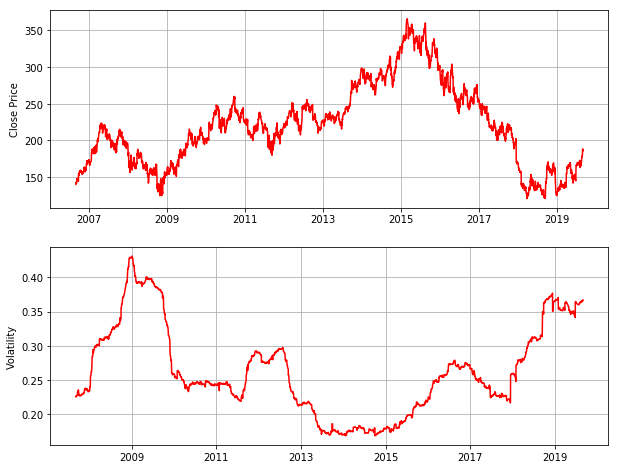

ges 



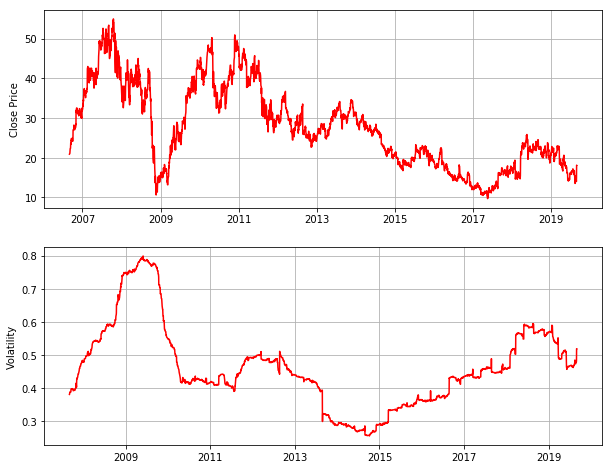

mc 



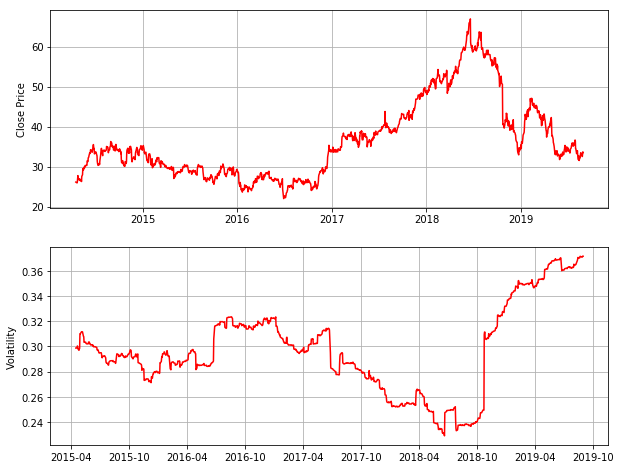

tif 



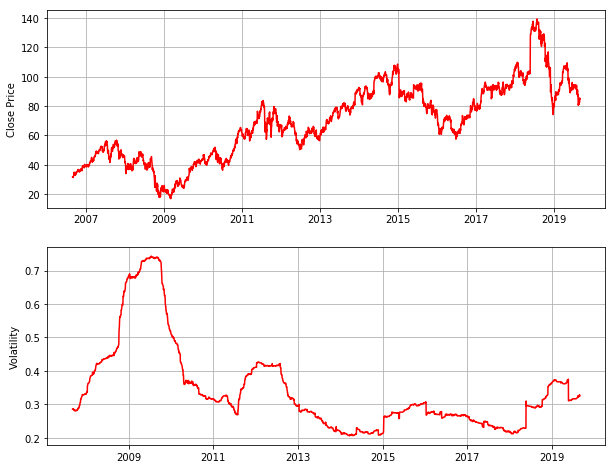

In [151]:
import matplotlib.pylab as pylab

def std(name):
    S_i = name['Close']

    S_i_minus_1 = name['Close'].shift(1)

    name['U_sequence'] = np.log(S_i/S_i_minus_1)

    s = name['U_sequence'].rolling(window=252,center = False).std()

    name['Volatility']=s*np.sqrt(252)

    fig = pylab.figure(figsize = (10,8))

    pylab.subplot (2,1,1)

    pylab.plot(name['Close'],'r-',label = 'Close',linewidth = 1.5)

    pylab.ylabel('Close Price')

    pylab.grid('True')

    pylab.subplot (2,1,2)

    pylab.plot(name['Volatility'],'r-',label = 'volatility',linewidth = 1.5)

    pylab.ylabel('Volatility')

    pylab.grid('True')

    pylab.show()
    
    
i = 0

for name in stockList :
    print(stockList_str[i],"\n")
    std(name)
    print("\n")
    i = i+1

#### 8. Calculate and visualize the recent ﬁve years S-ratios for the stocks.

In [153]:
def sharpRatio(name):
    sharp = (np.mean(name['Close'][1764:]-0.03))/np.std(name['Close'][1764:])

    print("The sharp ratio is" ,sharp)
    

i = 0

for name in stockList :
    print(stockList_str[i],"\n")
    sharpRatio(name)
    print("\n")
    i = i+1

Google 

The sharp ratio is 3.387657649649653


Apple 

The sharp ratio is 3.230811236773707


Microsoft 

The sharp ratio is 2.3726281071766113


Amazon 

The sharp ratio is 1.6487418886665348


INTC 

The sharp ratio is 4.2814863326515695


J.P MORGAN 

The sharp ratio is 3.6229265819551957


BANK OF AMERICA 

The sharp ratio is 3.4027916985285995


HSBC 

The sharp ratio is 6.805872065171377


CITI BANK 

The sharp ratio is 11.931992479251193


GOLDMAN 

The sharp ratio is 6.253222562624086


wmt 

The sharp ratio is 6.404538005760018


tgt 

The sharp ratio is 7.105066912222341


jcp 

The sharp ratio is 1.922717972169126


kss 

The sharp ratio is 4.6921196196662684


hd 

The sharp ratio is 3.35359790738732


pfe 

The sharp ratio is 8.249049034733293


mrk 

The sharp ratio is 6.8466947156833315


jnj 

The sharp ratio is 7.0004667310622475


abbv 

The sharp ratio is nan


bmy 

The sharp ratio is 7.744159548619406


tpr 

The sharp ratio is 5.564754278397801


hm_b 

The sharp

## B) Polish your software so that (20 points)

In [162]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from math import log
import datetime as DT
import numpy as np
import pandas as pd

Enter your stock for finding its max, min, mean, median values in last 1,3,5,10 years: AAPL

 stock AAPL  in last one year for close price,
 it has a max value:
 300.3500061035156 
 min value:
 147.92999267578125 
 mean value:
 210.03408310905334 
 median vaule:
 203.32500457763672

 stock AAPL  in last three year for close price,
 it has a max value:
 300.3500061035156 
 min value:
 117.91000366210938 
 mean value:
 183.38054381757578 
 median vaule:
 176.22500610351562

 stock AAPL  in last five year for close price,
 it has a max value:
 300.3500061035156 
 min value:
 90.33999633789062 
 mean value:
 154.93335450965384 
 median vaule:
 150.88500213623047

 stock AAPL  in last ten year for close price,
 it has a max value:
 300.3500061035156 
 min value:
 27.435714721679688 
 mean value:
 110.69734278199213 
 median vaule:
 99.62000274658203


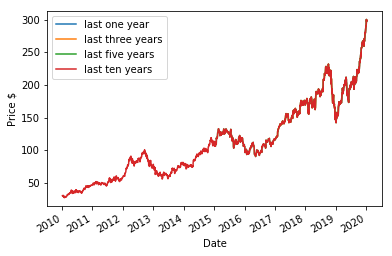

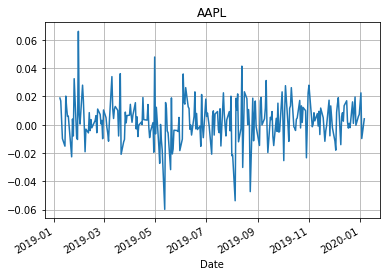


 In last one year, The stock log return has a Max of: 0.06610105934348101 a Min of: -0.05987681027752314 a Mean of: 0.002799323627400941 and a Median of: nan


/Users/wusuyi/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


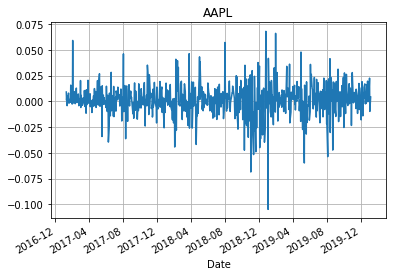


 In last three years, The stock log return has a Max of: 0.06805254299266192 a Min of: -0.10492435551203613 a Mean of: 0.0012344198053680854 and a Median of: nan


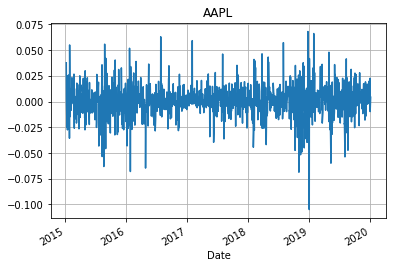


 In last five years, The stock log return has a Max of: 0.06805254299266192 a Min of: -0.10492435551203613 a Mean of: 0.0008111583429637279 and a Median of: nan


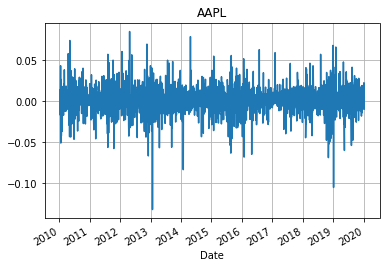


 In last ten years, The stock log return has a Max of: 0.08502232447975022 a Min of: -0.1318846984326296 a Mean of: 0.0009104446936004795 and a Median of: nan
we should buy it


In [166]:

## section1: Calculate max, min, mean, median of the stock price in the last 1, 3, 5,10 years:
def Cal_basic_values():
    stockname=str(input('Enter your stock for finding its max, min, mean, median values in last 1,3,5,10 years: '))
    today = DT.date.today()
    year_ago = str(today - DT.timedelta(days=365))
    year3_ago = str(today - DT.timedelta(days=365 * 3))
    year5_ago = str(today - DT.timedelta(days=365 * 5))
    year10_ago = str(today - DT.timedelta(days=365 * 10))

    stock_one_year = web.DataReader(stockname, data_source='yahoo', start=year_ago, end=today)
    stock_info_oneyear = stock_one_year['Close']
    
    ##calculate basic values last 1 year:
    
    y1max = stock_info_oneyear.max()
    y1min = stock_info_oneyear.min()
    y1mean = stock_info_oneyear.mean()
    y1median = stock_info_oneyear.median()
    print("\n stock",stockname," in last one year for close price,\n it has a max value:\n",y1max,"\n min value:\n",y1min,"\n mean value:\n",y1mean,"\n median vaule:\n",y1median)

    ##calculate basic values last 3 year:
    stock_three_years = web.DataReader(stockname, data_source='yahoo', start=year3_ago, end=today)
    stock_info_threeyears = stock_three_years['Close']
    y3max = stock_info_threeyears.max()
    y3min = stock_info_threeyears.min()
    y3mean = stock_info_threeyears.mean()
    y3median = stock_info_threeyears.median()
    print("\n stock", stockname, " in last three year for close price,\n it has a max value:\n", y3max, "\n min value:\n",
          y3min, "\n mean value:\n", y3mean, "\n median vaule:\n", y3median)

    ##calculate basic values last 5 year:
    
    stock_five_years = web.DataReader(stockname, data_source='yahoo', start=year5_ago, end=today)
    stock_info_fiveyears = stock_five_years['Close']
    y5max = stock_info_fiveyears.max()
    y5min = stock_info_fiveyears.min()
    y5mean = stock_info_fiveyears.mean()
    y5median = stock_info_fiveyears.median()
    print("\n stock", stockname, " in last five year for close price,\n it has a max value:\n", y5max, "\n min value:\n",
          y5min, "\n mean value:\n", y5mean, "\n median vaule:\n", y5median)

    ##calculate basic values last 10 year:
    stock_ten_years = web.DataReader(stockname, data_source='yahoo', start=year10_ago, end=today)
    stock_info_tenyears = stock_ten_years['Close']
    y10max = stock_info_tenyears.max()
    y10min = stock_info_tenyears.min()
    y10mean = stock_info_tenyears.mean()
    y10median = stock_info_tenyears.median()
    print("\n stock", stockname, " in last ten year for close price,\n it has a max value:\n", y10max, "\n min value:\n",
          y10min, "\n mean value:\n", y10mean, "\n median vaule:\n", y10median)


##section2: The plot of the stock close price in 1,3,5,10 years


    df = pd.DataFrame({'last one year': stock_info_oneyear,'last three years':stock_info_threeyears,'last five years':stock_info_fiveyears,'last ten years':stock_info_tenyears })
    df.plot()
    plt.xlabel("Date")
    plt.ylabel("Price $")
    plt.show()

##section3: max, min, mean, median of the stock log return in the last 1, 3, 5,10 years

## last 1 year
    S_i = stock_one_year['Close']
    S_i_minus_1 = stock_one_year['Close'].shift(1)
    stock_one_year['U_sequence'] = np.log(S_i/S_i_minus_1)
    stock_one_year['U_sequence'].plot(title = stockname,grid = True)
    plt.show()



    y1logmax = np.max(stock_one_year['U_sequence'])
    y1logmin = np.min(stock_one_year['U_sequence'])
    y1logmedian = np.median(stock_one_year['U_sequence'])
    y1logmean = np.mean(stock_one_year['U_sequence'])
    
    print("\n In last one year, The stock log return has a Max of:", y1logmax, "a Min of:",y1logmin,"a Mean of:",y1logmean,"and a Median of:",y1logmedian)

## last 3 year

    S_i = stock_three_years['Close']
    S_i_minus_1 = stock_three_years['Close'].shift(1)
    stock_three_years['U_sequence'] = np.log(S_i/S_i_minus_1)
    stock_three_years['U_sequence'].plot(title = stockname,grid = True)
    plt.show()
    
    

    y3logmax = np.max(stock_three_years['U_sequence'])
    y3logmin = np.min(stock_three_years['U_sequence'])
    y3logmedian = np.median(stock_three_years['U_sequence'])
    y3logmean = np.mean(stock_three_years['U_sequence'])
    print("\n In last three years, The stock log return has a Max of:", y3logmax, "a Min of:", y3logmin, "a Mean of:",
          y3logmean, "and a Median of:", y3logmedian)

    
    ## last 5 year


    S_i =stock_five_years['Close']
    S_i_minus_1 =stock_five_years['Close'].shift(1)
    stock_five_years['U_sequence'] = np.log(S_i/S_i_minus_1)
    stock_five_years['U_sequence'].plot(title = stockname,grid = True)
    plt.show()

    y5logmax = np.max(stock_five_years['U_sequence'])
    y5logmin = np.min(stock_five_years['U_sequence'])
    y5logmedian = np.median(stock_five_years['U_sequence'])
    y5logmean = np.mean(stock_five_years['U_sequence'])
    print("\n In last five years, The stock log return has a Max of:", y5logmax, "a Min of:", y5logmin, "a Mean of:", y5logmean,
          "and a Median of:", y5logmedian)

    
    ## last 10 year
    S_i = stock_ten_years['Close']
    S_i_minus_1 = stock_ten_years['Close'].shift(1)
    stock_ten_years['U_sequence'] = np.log(S_i/S_i_minus_1)
    stock_ten_years['U_sequence'].plot(title = stockname,grid = True)
    plt.show()


    y10logmax = np.max(stock_ten_years['U_sequence'])
    y10logmin = np.min(stock_ten_years['U_sequence'])
    y10logmedian = np.median(stock_ten_years['U_sequence'])
    y10logmean = np.mean(stock_ten_years['U_sequence'])
    print("\n In last ten years, The stock log return has a Max of:", y10logmax, "a Min of:", y10logmin, "a Mean of:", y10logmean,
          "and a Median of:", y10logmedian)


##section 4:4. A SIMPLE suggestion for customers about buy/sell/hold according to the data you get
    sharp = (np.mean(stock_one_year['U_sequence'])/np.std(stock_one_year['U_sequence']))
             
    if sharp > 0 :
             print("we should buy it")
    else:
             print("we should sell it")


Cal_basic_values()

# Write your SVD (20 points)

### Use eig function in numy to implement a SVD so that if you output U,S,V as linalg.svd(...). Your SVD signature is

#### You should verify if U,V are unitary matrices and your SVD really works.
#### You don’t need to use very big input matrix because such eig based implementation is not eﬃcient in practice.

In [175]:
## Verify SVD funtion

n=3
mu=0.2
sigma=3

A=5*np.random.normal(mu,sigma,[n,n])

def mySVD(X):

    print("\n the input X is \n"+str(X))
    U, S, V = np.linalg.svd(X)
    print("\n Its SVD values are following:\n")
    print ("\n singular values S: \n")
    print(str(S))
    print("\n Matrix U: \n")
    print(str(U))
    print("\n Matrix V: \n")
    print(str(V))

    print("\n verity U is an unitary matrix\n")
    UxU_t=np.dot(U,U.T)
    print("U*U'=\n"+str(UxU_t))

    print("\n verify V is an unitary matrix\n")
    V_txV=np.dot(V.T,V)
    print("V*V'=\n"+str(V_txV))

    print("\n verify A=U*diag(S)*V and This SVD function really works\n")
    A1=np.asmatrix(U)*np.asmatrix(np.diag(S))*np.asmatrix(V)
    print(A1)
    print("\n Compare to the original A\n"+str(X))

mySVD(A)


 the input X is 
[[-11.34230309 -17.83687193  -9.18376372]
 [  0.57049416  -3.05333043 -19.79412649]
 [-15.12040124  27.90736174  29.3931542 ]]

 Its SVD values are following:


 singular values S: 

[48.5615811  17.54198187 11.74971018]

 Matrix U: 

[[ 0.33011139 -0.94385252  0.01299571]
 [ 0.34248507  0.13259042  0.93012029]
 [-0.87961949 -0.30259247  0.36702501]]

 Matrix V: 

[[ 0.20080404 -0.64828478 -0.73444168]
 [ 0.8754098   0.4552494  -0.16249817]
 [-0.43969923  0.61030716 -0.65893077]]

 verity U is an unitary matrix

U*U'=
[[ 1.00000000e+00  3.32844739e-17 -3.26711711e-16]
 [ 3.32844739e-17  1.00000000e+00 -1.53875788e-16]
 [-3.26711711e-16 -1.53875788e-16  1.00000000e+00]]

 verify V is an unitary matrix

V*V'=
[[ 1.00000000e+00  8.17134206e-17 -8.44035507e-17]
 [ 8.17134206e-17  1.00000000e+00  6.43359324e-17]
 [-8.44035507e-17  6.43359324e-17  1.00000000e+00]]

 verify A=U*diag(S)*V and This SVD function really works

[[-11.34230309 -17.83687193  -9.18376372]
 [  0.5704

# Pricing Barrier Options (30 points)



#### 1.  Price the following down-and-in put option with by using a sequence of barrier values: S b = [70, 60, 50, ...20, 10, 1] and compare the prices with its price under BS model.

In [184]:
from math import log, sqrt, exp

from scipy import stats

def exotic_option_price(S,K,T,r,sigma,Sb):
    
    d1 = (log(S/K)+(r+(sigma**2)/2)*T)/(sigma*sqrt(T))

    d2 = (log(S/K)+(r-(sigma**2)/2)*T)/(sigma*sqrt(T))

    d3 = (log(S/Sb)+(r+(sigma**2)/2)*T)/(sigma*sqrt(T))

    d4 = (log(S/Sb)+(r-(sigma**2)/2)*T)/(sigma*sqrt(T))

    d5 = (log(S/Sb)-(r-(sigma**2)/2)*T)/(sigma*sqrt(T))

    d6 = (log(S/Sb)-(r+(sigma**2)/2)*T)/(sigma*sqrt(T))

    d7 = (log(S*K/Sb**2)-(r-(sigma**2)/2)*T)/(sigma*sqrt(T))

    d8 = (log(S*K/Sb**2)-(r+(sigma**2)/2)*T)/(sigma*sqrt(T))

    a = (Sb/S)**(-1+2*r/sigma**2)

    b = (Sb/S)**(1+2*r/sigma**2)

    N_d1 = stats.norm.cdf(d1,0.0,1.0)

    N_d2 = stats.norm.cdf(d2,0.0,1.0)

    N_d3 = stats.norm.cdf(d3,0.0,1.0)

    N_d4 = stats.norm.cdf(d4,0.0,1.0)

    N_d5 = stats.norm.cdf(d5,0.0,1.0)

    N_d6 = stats.norm.cdf(d6,0.0,1.0)

    N_d7 = stats.norm.cdf(d7,0.0,1.0)

    N_d8 = stats.norm.cdf(d8,0.0,1.0)

    option_price = (K*exp(-r*T)*(N_d4-N_d2-a*(N_d7-N_d5))-S*(N_d3-N_d1-b*(N_d8-N_d6))) 
    

    return option_price


Sb = [70,60,50,40,30,20,10,1]

S = 100.0

for i in Sb:
    if i < S:

        print(exotic_option_price(100.0,105.0,0.75,0.05,0.4,i))
    else:
        print("This option cannot be activated")
        
        
def bs_put_value(S,K,T,r,sigma):

    d1 = (log(S/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))

    d2 = d1 - sigma*sqrt(T)

    N_n_d2 = stats.norm.cdf(-d2,0.0,1.0)

    N_n_d1 = stats.norm.cdf(-d1,0.0,1.0)

    put_price = K * exp(-r*T)*N_n_d2 - S*N_n_d1

    return put_price

bs_put_value(100.0,105.0,0.75,0.05,0.4)

3.6916395922913487
7.827235111694648
11.693184972663495
13.800461150704244
14.358038026548833
14.403646480253258
14.404020090558788
14.404020094764824


14.404020094764824

#### Price the down-and-out-put option with by using a sequence of σ : σ = [0.55, 0.5, 0.45, 0.4, 0.35..., 0.1] and visualize the relationship between volatility and such a barrier option price.

[5.144999427063073, 5.995508037275634, 6.915400344302768, 7.827235111694648, 8.578140567804986, 8.922780465810163, 8.576487500019297, 7.430112522778224, 5.79403627741646, 4.070633356222132]


/Users/wusuyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


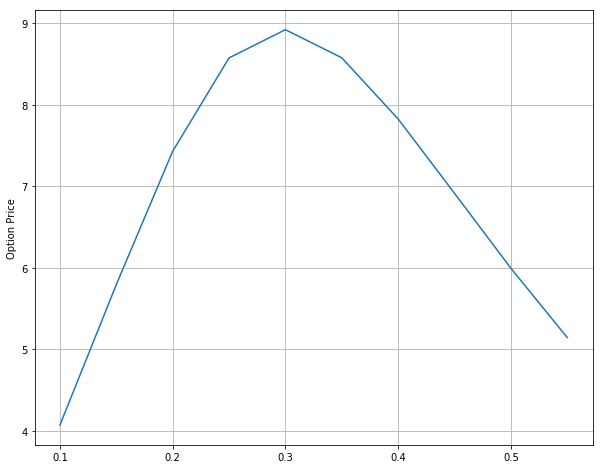

In [187]:
S = 100.0

Sb = 60

sigma = np.linspace(0.55,0.1,10,endpoint=True, retstep=False)

optionPrice = []



for i in sigma:

    optionPrice.append(exotic_option_price(S,105.0,0.75,0.05,i,Sb))

print(optionPrice)

import matplotlib.pylab as pylab

fig = pylab.figure(figsize = (10,8))

pylab.plot(sigma,optionPrice, label='Option Price', linewidth=1.5)

pylab.ylabel('Option Price')

pylab.grid('on')